<a href="https://colab.research.google.com/github/shihchun/ML-homework/blob/master/ML1081_Exercise02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第二次作業
第一題：利用Keras，建立一個類神經網路，辨識MNIST的手寫數字資料。

```
# [0,9] 的十位數字 
# (one hot = True 的編碼處理keras內置解碼器)
# （可以用類似python translate() 跟string.maketrans()完成映射編碼的sourcecode）) 大概了解即可
# 0: 1000000000
# 1: 0100000000
# ......
```

[範例](https://ithelp.ithome.com.tw/articles/10191404)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.7724 - acc: 0.8054 - val_loss: 0.3275 - val_acc: 0.9091
Epoch 2/10
 - 1s - loss: 0.3050 - acc: 0.9148 - val_loss: 0.2528 - val_acc: 0.9301
Epoch 3/10
 - 1s - loss: 0.2418 - acc: 0.9317 - val_loss: 0.2139 - val_acc: 0.9409
Epoch 4/10
 - 1s - loss: 0.2002 - acc: 0.9430 - val_loss: 0.1814 - val_acc: 0.9516
Epoch 5/10
 - 1s - loss: 0.1680 - acc: 0.9519 - val_loss: 0.1620 - val_acc: 0.9552
Epoch 6/10
 - 1s - loss: 0.1441 - acc: 0.9594 - val_loss: 0.1460 - val_acc: 0.9591
Epoch 7/10
 - 1s - loss: 0.1251 - acc: 0.9645 - val_loss: 0.1327 - val_acc: 0.9624
Epoch 8/10
 - 1s - loss: 0.1099 - acc: 0.9695 - val_loss: 0.1243 - val_acc: 0.9642
Epoch 9/10
 - 1s - loss: 0.0968 - acc: 0.9735 - val_loss: 0.1160 - val_acc: 0.9668
Epoch 10/10
 - 1s - loss: 0.0866 - acc: 0.9770 - val_loss: 0.1128 - val_acc: 0.9652
10000/10000 [==============================] - 0s 37us/step

	[Info] Accuracy of testing data = 96.9%
[7 2 1 0 4 1 4 9 

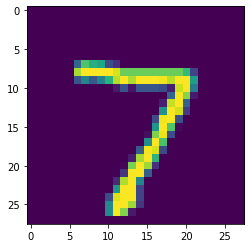

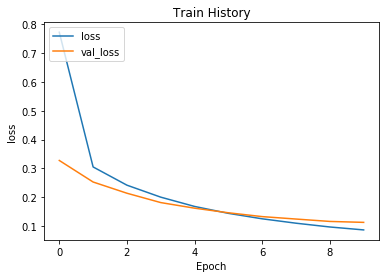

In [0]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

# 預測(prediction)
X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

# 顯示 第一筆訓練資料的圖形，確認是否正確
print(np.shape(X_test))
plt.imshow(X_test[0])
plt.show() 
plt.figure()
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist', one_hot=True)

X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels # 這個label是one_hot編碼來表示數字輸出
Y_test = mnist.test.labels

import numpy as np
# print( np.shape(X_train) ) #(55000, 784) 55000 張做過標籤的影像
# 需要將784 也就是28*28 的影像降低維度，做reshape
images = tf.reshape(X_train, [-1,28,28,1]) # 改變train_x shape to [28,28,1]
# print(np.shape(images)) # (55000, 28, 28, 1)


# 重新 reshape 所有影像
X_train = tf.reshape(mnist.train.images, [-1,28,28,1])
X_test = tf.reshape(mnist.test.images, [-1,28,28,1])


num_outputs = 10 # 0-9 digits
num_inputs = 784 # total pixels

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#Your code here



Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


第二題：利用Keras，設計一個CNN網路，訓練資料同樣是MNIST

[範例](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py) 做修改

- learning_rate = 0.01
- n_epochs = 10
- batch_size = 100
- layer1 filter = 32
- layer2 filter = 64
- aleast droup once 0.5 50%

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.2184 - acc: 0.9339 - val_loss: 0.0517 - val_acc: 0.9829
Epoch 2/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0812 - acc: 0.9755 - val_loss: 0.0406 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0616 - acc: 0.9816 - val_loss: 0.0335 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0492 - acc: 0.9847 - val_loss: 0.0307 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0458 - acc: 0.9860 - val_loss: 0.0267 - val_acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0267 - val_acc: 0.9920
Epoch 7/10
60000/60000 [=========================

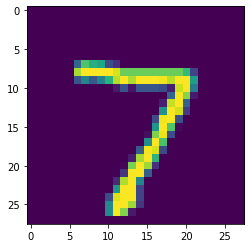

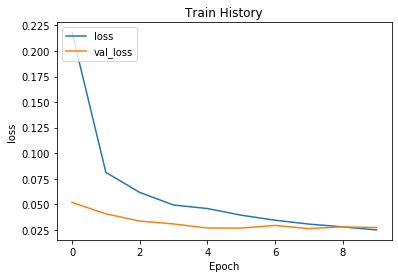

In [0]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 100 # batch size
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), # filter 32
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) # filter 64
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Dropout 0.5
model.add(Dense(num_classes, activation='softmax'))

# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# set learning rate 0.01
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              # optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# 預測(prediction)

X = x_test[0:10,:]
predictions = model.predict_classes(X)
print(predictions)

# 顯示 第一筆訓練資料的圖形，確認是否正確
plt.imshow(x_test[0][:,:,0])
plt.show() 
plt.figure()
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist', one_hot=True)

X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels # 這個label是one_hot編碼來表示數字輸出
Y_test = mnist.test.labels

# 重新 reshape 所有影像
X_train = tf.reshape(mnist.train.images, [-1,28,28,1])
X_test = tf.reshape(mnist.test.images, [-1,28,28,1])

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Reshape
from keras.optimizers import SGD

n_filters=[32,64] # 設計兩層的conv網路的意思吧！
# 所以有兩個（cnn + poolmax），50000張分別進入(28,28,1) 進入filterx32 會變成(28，28，32), 
# poolingmax 假設strike不變所以（2的話會做亞採樣去用遮罩兩個找一次會變成（14,14,32））
# 然後結果去再做CNN（28, 28, 32） -->  (28,28,32*64)
# 然後又沒有說poolingmax要多少 strike = 1
# 然後做Dense 全連接層（fully connected） 收集特徵
# 再來沒有說dropout多少所以不做
# 平坦化（28*28*32*64,）--> reshape --> 輸出

learning_rate = 0.01
n_epochs = 10
batch_size = 100

#Your code here

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same',  # same， 所以影像不會補零，遮罩（5，5）可以罩兩個零（padding=2時）
                 input_shape=(28,28,1),  
                 activation='relu')) # activation也可以用sigmoid  sigma函數 relu比較陡峭
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=64,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
# model.add(Dropout(0.25))  

model.add(Flatten())  

# model.add(Dense(128, activation='relu'))  
# model.add(Dropout(0.5))  

# model.add(Dense(10, activation='softmax'))  

model.summary()  
print("END")  



Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
____

# 使用tensorflow

[Colab使用tensorflow完成CNN辨識 relu](https://colab.research.google.com/drive/13coYGpGLmqRPgcW9qbhlDt_NPlOStRUV)
